In [2]:
# Algorithmin Trading
# MACD: Moving average Convergence Divergence
# This shows relationship ship between 2 moving averages of a security's price
# MACD is calculated by subtracting 26-period Exponential Moving Average (EMA) from 12-period EMA-This is MACD line
# Then a 9-day EMA is plotted on top of the MACD line, which can function as a trigger to buy or sell a security

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [1]:
# Input the Security/Stock/Company ticker symbol
symbol = input("Enter the Ticker Symbol of your choice: ")
symbol

Enter the Ticker Symbol of your choice: MS


'MS'

In [3]:
# getting scruity data from Yahoo finance
end_date = datetime.today().strftime('%Y-%m-%d')
data = web.DataReader(symbol, data_source = 'yahoo', start = '2020-01-01', end = end_date) # this imports data with date as index
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,52.060001,51.169998,51.200001,52.040001,7808000.0,50.895214
2020-01-03,51.450001,50.830002,51.220001,51.200001,6706000.0,50.073692
2020-01-06,51.040001,50.459999,50.669998,51.020000,7476700.0,49.897655
2020-01-07,51.189999,50.709999,51.040001,50.919998,4538100.0,49.799850
2020-01-08,51.790001,50.900002,50.959999,51.570000,6185200.0,50.435551


In [4]:
data.shape

(159, 6)

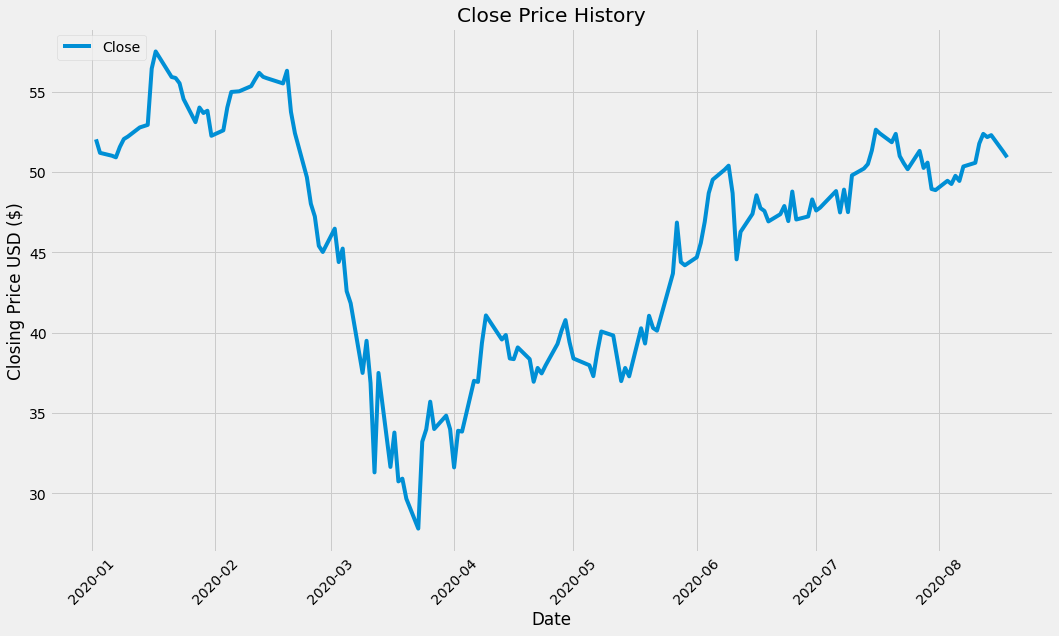

In [5]:
# Visualize the stock data
plt.figure(figsize = (16, 9))
plt.plot(data['Close'], label = "Close")
plt.xticks(rotation = 45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()

In [6]:
# Calculating the MACD line and Signal line

# Calculating the short term exponential moving average (EMA)
s_ema = data.Close.ewm(span = 12, adjust = False).mean()

# Calculating the long term EMA
l_ema = data.Close.ewm(span = 26, adjust = False).mean()

# Calculating the MACD line
MACD = s_ema - l_ema

# Calculating the signal line
signal = MACD.ewm(span = 9, adjust = False).mean()


<ipython-input-7-70df1c83c8da>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(data.index, MACD, label = 'Morgan Stanley MACD Analysis', Color = 'red')


<function matplotlib.pyplot.show(close=None, block=None)>

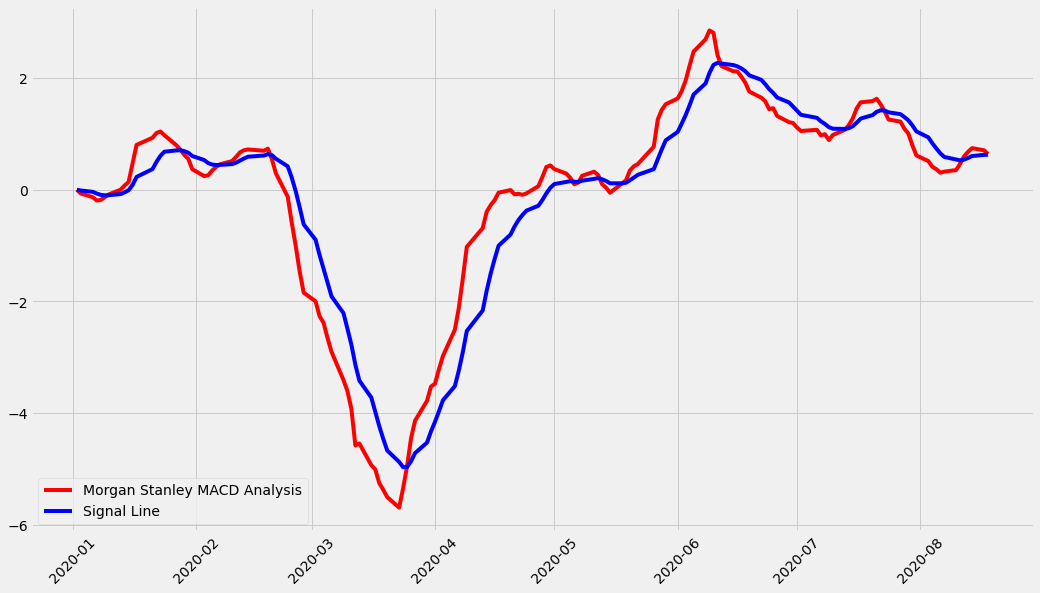

In [7]:
# Ploting the chart
plt.figure(figsize = (16,9))
plt.plot(data.index, MACD, label = 'Morgan Stanley MACD Analysis', Color = 'red')
plt.plot(data.index, signal, label = 'Signal Line', color = 'blue')
plt.xticks(rotation = 45)
plt.legend(loc = 'lower left')
plt.show

In [8]:
# Adding the MACD and Signal line values to the existing dataset
data['MACD'] = MACD
data['Signal Line'] = signal

data.head()

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line
Date,,,,,,,,
2020-01-02,52.060001,51.169998,51.200001,52.040001,7808000.0,50.895214,0.000000,0.000000
2020-01-03,51.450001,50.830002,51.220001,51.200001,6706000.0,50.073692,-0.067009,-0.013402
2020-01-06,51.040001,50.459999,50.669998,51.020000,7476700.0,49.897655,-0.133104,-0.037342
2020-01-07,51.189999,50.709999,51.040001,50.919998,4538100.0,49.799850,-0.191348,-0.068143
2020-01-08,51.790001,50.900002,50.959999,51.570000,6185200.0,50.435551,-0.182948,-0.091104


In [9]:
# Creating a fuction to signal buy and sell of an asset
def buy_sell(sig): 
    buy = []
    sell = []
    flag = -1
    
    for i in range(0, len(sig)):
        if sig['MACD'][i] > sig['Signal Line'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append(sig['Close'][i])
                flag = 1
            else:
                buy.append(np.nan)
        elif sig['MACD'][i] < sig['Signal Line'][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(sig['Close'][i])
                flag = 0
            else: 
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    
    return (buy, sell)

            




In [10]:
# Creating buy and sell column in the dataset
a = buy_sell(data)

data['Buy_Trigger'] = a[0]
data['Sell_Trigger'] = a[1]


In [11]:
# Updated Dataset
data.head(10)

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy_Trigger,Sell_Trigger
Date,,,,,,,,,,
2020-01-02,52.060001,51.169998,51.200001,52.040001,7808000.0,50.895214,0.000000,0.000000,NaN,NaN
2020-01-03,51.450001,50.830002,51.220001,51.200001,6706000.0,50.073692,-0.067009,-0.013402,NaN,51.200001
2020-01-06,51.040001,50.459999,50.669998,51.020000,7476700.0,49.897655,-0.133104,-0.037342,NaN,NaN
2020-01-07,51.189999,50.709999,51.040001,50.919998,4538100.0,49.799850,-0.191348,-0.068143,NaN,NaN
2020-01-08,51.790001,50.900002,50.959999,51.570000,6185200.0,50.435551,-0.182948,-0.091104,NaN,NaN
2020-01-09,52.250000,51.820000,52.169998,52.060001,7308000.0,50.914772,-0.135194,-0.099922,NaN,NaN
2020-01-10,52.470001,51.919998,52.150002,52.209999,7686800.0,51.061474,-0.084274,-0.096792,52.209999,NaN
2020-01-13,52.779999,52.070000,52.209999,52.779999,8334200.0,51.618935,0.002052,-0.077024,NaN,NaN
2020-01-14,53.250000,52.680000,53.060001,52.860001,9602000.0,51.697178,0.076044,-0.046410,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

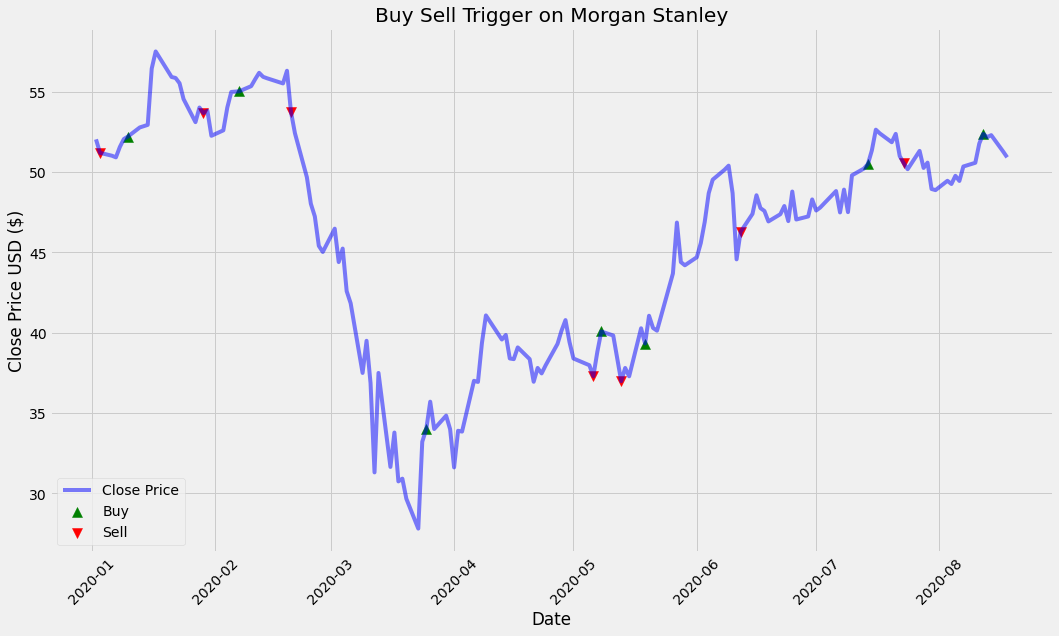

In [12]:
# Visualizing Buy Sell triggers with stock data

plt.figure(figsize = (16, 9))
plt.scatter(data.index, data['Buy_Trigger'], color = 'green', label = 'Buy', marker = '^', alpha = 1, s = 100)
plt.scatter(data.index, data['Sell_Trigger'], color = 'red', label = 'Sell', marker = 'v', alpha = 1, s = 100)
plt.plot(data.index, data['Close'], color = 'Blue', alpha = 0.5, label = 'Close Price')
plt.title('Buy Sell Trigger on Morgan Stanley')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'lower left')
plt.show

In [57]:
# The plot show the locations where the trader should Buy and Sell the security
# Limitation of MACD
#     - It can sometime signal a possible reversal - False Positive
#     - False Negative
